# Example: Simulating first-order decay

This example will walk you through the steps necessary to setup and simulate a simple process in which a species X undergoes first order decay. Mathematically, this system amounts to: 

$ \frac{dX}{dt} = -\gamma X $. 

Given an initial condition $X_0$, the analytical solution is: 

$X(t)=X_0 e^{-\gamma t}$. 

Simulating this process in GeneSSA requires three objects:

    1. A reaction that consumes X
    2. A network in which X exists
    3. A solver for simulating the process
    
We will assume $\gamma=2\ min^{-1}$ and $X_0=100$. 

### 1. Creating a reaction

First we need to define our first order decay reaction. GeneSSA offers many different types of reaction objects, each designed to accomodate different types of propensity functions. Some of the more familiar options include:

    * MassAction - obeys mass action kinetics
    * Hill - obeys Hill kinetics
    
Our decay reaction obeys mass action kinetics, so we will instantiate a `MassAction` reaction object with a rate constant $\gamma=2\ min^{-1}$. Note that when instantiating a reaction, stoichiometries are defined by lists of stoichiometric coefficients. The parameter `k` is the rate constant.

In [4]:
from genessa.kinetics.massaction import MassAction

decay = MassAction(stoichiometry=[-1], k=2)

### 2. Creating a network

Creating a network is straight forward. We simply define the number of species that exist within the network using the parameter $N$. The network may also be subject to one or more external input signals, the number of which is defined by the parameter $I$. Finally, we can also add one or more reactions to the network at this stage.

In [5]:
from genessa.networks.networks import Network

network = Network(N=1, reactions=[decay])

### 3. Creating a solver object

When instantiating a GeneSSA solver we must also define the initial condition for each dimension of the state space. Initial conditions may be defined as a vector of values, or a vector of tuples where each tuple consists of a (mu, sigma) pair that parameterizes a Gaussian distribution from which the initial conditions are randomly sampled. If no initial condition is specified, all states are initialized as zero by default.

In [6]:
from genessa.solver.stochastic import MonteCarloSimulation

solver = MonteCarloSimulation(network, ic=[100])

# Running a simulation

The solver provides a `run()` method used to execute a set of simulations. This method takes several parameters, including:

    N: the number of independent simulations
    
    duration: total duration of each simulation
    
    dt: the sampling resolution

In [15]:
from genessa.signals.signals import cSignal

timeseries = solver.run(N=100, duration=3, dt=0.01)

# Plotting the simulated dynamics

The solver returns a `timeseries` instance that contains each of the simulated trajectories for all state dimensions within the network. These trajectories can be accessed directly via the `timeseries.states` attribute.

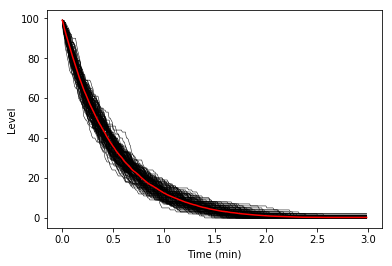

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# define the state dimension of interest
species = 0

# create figure
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Time (min)')
ax.set_ylabel('Level')

# add a black line for each individual trajectory 
for trajectory in timeseries.states[:, species, :]:
    ax.plot(timeseries.t, trajectory, '-k', lw=0.5)

# add a red line for the mean of all simulated trajectories
_ = ax.plot(timeseries.t, timeseries.mean[species], '-r')